# Wave Propagation

 The height of the waves resulting from a pebble being dropping in still water can be represented by a sine wave equation that takes the following form,

$$h_1(x,y) = h_0\text{sin}(kr_1)$$

Here, $h_0$ represents the amplitude of the resulting waves, $k$ is the wavevector, which is inversely proportional to the wavelength according to the following relation, $k = 2\pi/\lambda$, and $r_1$ is the distance from the point of impact of the pebble on the water (Center of the propagating waves) to some other point (represented by just x,y), $r_1=\sqrt{(x-x_1)^2 + (y-y_1)^2}$, where $x_1$ and $y_1$ are the coordinates indicating the center of the circle.

In the event of another (or several) pebble(s) being dropped into the water, whose equation can be similarly represented as the following, $h_2(x,y) = h_0\text{sin}(kr_2)$, (Similarly, $r_2=\sqrt{(x-x_2)^2 + (y-y_2)^2}$ , where $x_2$ and $y_2$ are the coordinates for the point of impact for our second pebble.) we can assume that the waves will add linearly, thus giving us a final equation for the additive height of the wave (Wave Interference): 

$$h(x,y) = h_0\text{sin}(kr_1) + h_0\text{sin}(kr_2) $$

This definition for the height of the wave, as we'll see, can easily be extended to multiple pebbles being dropped.

## Outline

I'll start by writing a program to generate a static image of the resulting waves as a result of a single pebble, then extend this to multiple pebbles. From there, I'll edit the code to allow an animation to play, showing the propagtion of the waves in real time, then use k3d to generate a 3D animation of the waves. 

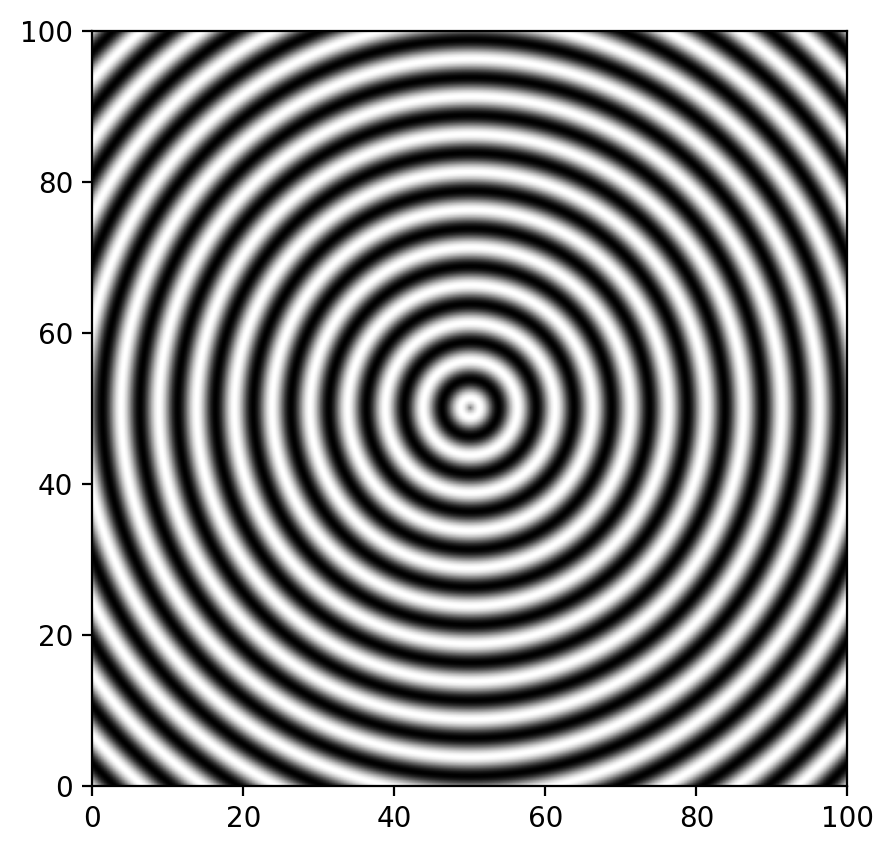

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import sqrt,sin,pi
import numpy as np


def waveHeight(wavelength,separation,pebbles):

    amp = 1.0 #Starting amplitude
    k = 2*pi/wavelength #Value for wavevector based on wavelength
    side = 100.0 #
    points = 500
    spacing = side/points #distance between each point
    
    x_points = []   
    y_points = []
    
    x_Height = np.zeros((points, points), float) #Array used to store values of the height of the wave
    for i in range(pebbles):
        x = (side - ((pebbles - 1) * separation)) / 2 + (separation * i)
        y = side / 2
    
        x_points.append(x)
        y_points.append(y)
    
    for i in range(points):
        y = spacing * i 
        for j in range(points):
            x = j * spacing
            r = []
            for l in range(pebbles):
                x1 = x_points[l]
                y1 = y_points[l]
                
                r.append(sqrt((x-x1)**2 + (y-y1)**2))
            height = 0
            for l in range(pebbles):
                height += amp * (sin(k*r[l]))
            x_Height[i,j] = height
            
    plt.figure(figsize=[5,5], dpi=200)      
    plt.imshow(x_Height,origin="lower",extent=[0,side,0,side]) #plot wave function
    plt.gray()
    plt.show() 
    
waveHeight(wavelength = 5, separation = 30, pebbles = 1)

By just changing the value assigned to pebbles, we can display the resulting static image in the case of two pebbles (or more) generating waves. We can also change the separation distance of the dropped pebbles, as well as the wavelength of the resulting wave, as shown by the following images

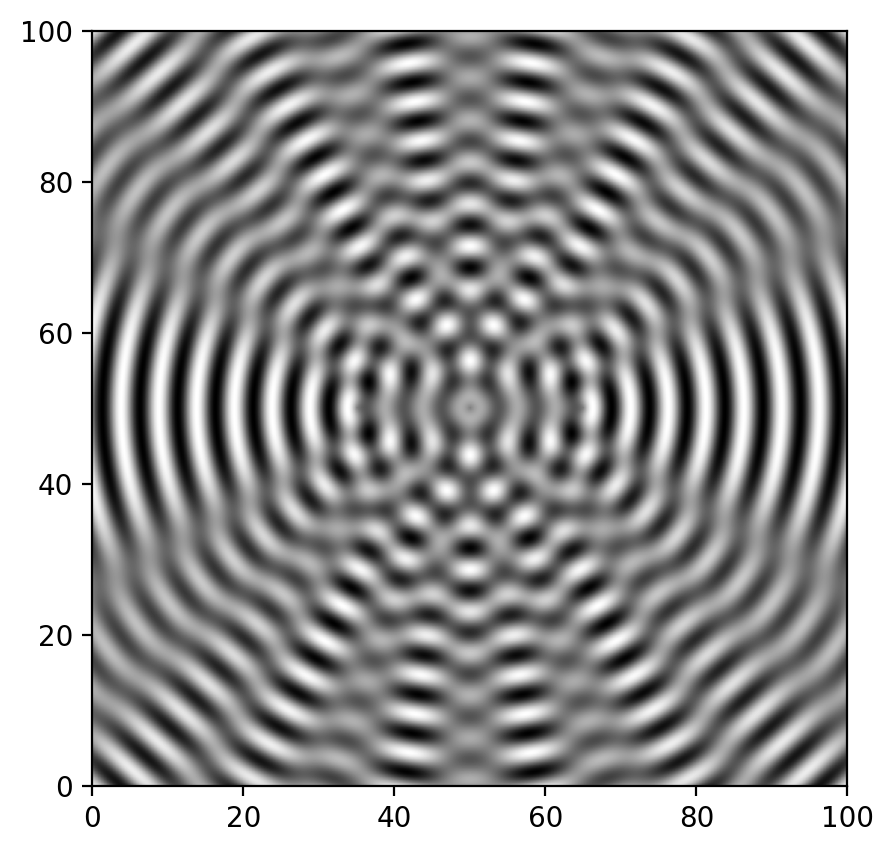

In [10]:
waveHeight(wavelength = 5, separation = 15, pebbles = 3)

Lets extend these plots to a 3-D Environment and allow for better user functionality. I'll be using k3d, a 3D visualization tool integrated with Jupyter Notebook, where these plots are ipywidgets, which will allow the changing of intitial conditions readily available.

In [24]:
import k3d
from numpy import empty
from ipywidgets import interact, interactive
import ipywidgets as wgt
from IPython.display import display
from math import sqrt,sin,pi


side = 100.0 #Length of the graph

FPS = 60 #Frames Per Second used in the animation

#Global Variables 
graph = None
graph_surface = None

#Main Function, also assigns key variables starting values that can be changed later on
#These variables pertain to key features of the propagatig wave, including their starting positions
def function(Frame=0, Wavelength=5.0, V=5.0, 
             Amplitude_1=1.0, Amplitude_2=1.0,Amplitude_3=1.0,
             x_1=50.0,x_2=50.0, x_3=50.0,
             y_1=50.0,y_2=50.0,y_3=50.0,Res=250):
    
    global graph
    
    
    k = 2*pi/Wavelength #wavevector calculation
    t = Frame/FPS 

    spacing = side/Res
    
    graph = empty([Res, Res], float)#Empty 2D array that will be used to define our graph
    for j in range(Res):
        y = spacing*j
        for i in range(Res):
            x = spacing*i
            
            #Values representing the distance between the center of propagation, and the point we are graphing 
            r1 = sqrt((x-x_1)**2+(y-y_1)**2) #In this case, the animaton supports up to 3 pebbles dropping, so three r values
            r2 = sqrt((x-x_2)**2+(y-y_2)**2)
            r3 = sqrt((x-x_3)**2+(y-y_3)**2)
            graph[j,i] = sin(k*r1-V*t) * Amplitude_1 + sin(k*r2-V*t) * Amplitude_2 + sin(k*r3-V*t) * Amplitude_3
    
    #Updates the 3D surface as the loop progresses
    if graph_surface:
        graph_surface.heights = graph #
    
#Widget that adds play and pause buttons for the animation, as well as a Frame modifier
start = wgt.Play(value=50,min=0, max=100,step=1,description="Play", disabled=False)

start_pos = wgt.IntSlider()
wgt.jslink((start, 'value'), (start_pos, 'value'))
start_menu = wgt.HBox([start,start_pos])#Makes the UI(Sliders) horizontal
display(start_menu)

#These are the values that are assigned to the UI that the user can adjust
initial_Cond = interactive(function,
            Frame= start_pos,
            Res= (10, 500),
            Wavelength=(0, 10),
            V=(0., 10.),
            Amplitude_1=   (0., 10.),
            Amplitude_2=   (0., 10.),
            Amplitude_3= (0., 10.),
            x_1=(0., side),
            y_1=(0., side),
            x_2=(0., side),
            y_2=(0., side),
            x_3=(0., side),
            y_3=(0., side))
display(initial_Cond)

#Code to plot our data in a 3D space using k3d
plot = k3d.plot()
graph_surface = k3d.surface(graph, bounds=[0,500,0,500])
surface.heights = graph
plot += graph_surface
plot.display()



interactive(children=(IntSlider(value=0, description='Frame'), IntSlider(value=5, description='Wavelength', ma…

Output()